In [1]:
import numpy as np
import matplotlib.pyplot as plt

## [skimage.color](https://scikit-image.org/docs/stable/api/skimage.color.html) - color conversion<a id='color'></a>

The `color` submmodule includes routines to convert to and from common color representations.  For example, RGB (Red, Green, and Blue) can be converted into many other representations.

In [2]:
import skimage.color as color

In [7]:
# Tab complete to see available functions in the color submodule
#color.rgb2gray()


### Example: conversion to grayscale

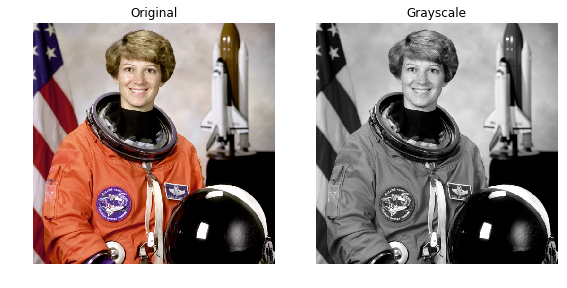

In [6]:
from skimage import data
from skimage import color

original = data.astronaut()
grayscale = color.rgb2gray(original)

# Plot the results
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(original)
ax[0].set_title("Original")
ax[0].axis('off')
ax[1].imshow(grayscale, cmap='gray')
ax[1].set_title("Grayscale")
ax[1].axis('off')

fig.tight_layout()
plt.show();

### Example: conversion to HSV

Usually, objects in images have distinct colors (hues) and luminosities, so that these features can be used to separate different areas of the image. In the RGB representation the hue and the luminosity are expressed as a linear combination of the R,G,B channels, whereas they correspond to single channels of the HSV image (the Hue and the Value channels). A simple segmentation of the image can then be effectively performed by a mere thresholding of the HSV channels.  

We first load the RGB image and extract the Hue and Value channels:

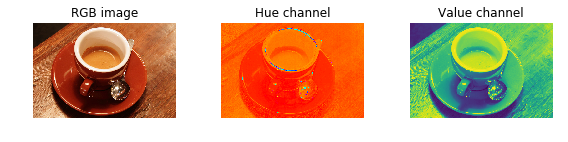

In [8]:
from skimage import data
from skimage.color import rgb2hsv

rgb_img = data.coffee()
hsv_img = rgb2hsv(rgb_img)
hue_img = hsv_img[:, :, 0]
value_img = hsv_img[:, :, 2]

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(8, 2))

ax0.imshow(rgb_img)
ax0.set_title("RGB image")
ax0.axis('off')
ax1.imshow(hue_img, cmap='hsv')
ax1.set_title("Hue channel")
ax1.axis('off')
ax2.imshow(value_img)
ax2.set_title("Value channel")
ax2.axis('off')

fig.tight_layout();

The cup and saucer have a Hue distinct from the remainder of the image, which can be isolated by thresholding

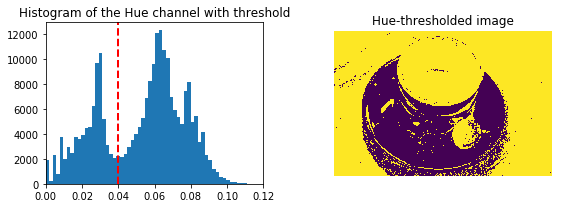

In [9]:
hue_threshold = 0.04
binary_img = hue_img > hue_threshold

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(8, 3))

ax0.hist(hue_img.ravel(), 512)
ax0.set_title("Histogram of the Hue channel with threshold")
ax0.axvline(x=hue_threshold, color='r', linestyle='dashed', linewidth=2)
ax0.set_xbound(0, 0.12)
ax1.imshow(binary_img)
ax1.set_title("Hue-thresholded image")
ax1.axis('off')

fig.tight_layout();

An additional threshold in the value channel can remote most of the shadow

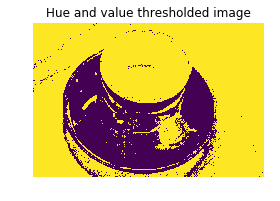

In [10]:
fig, ax0 = plt.subplots(figsize=(4, 3))

value_threshold = 0.10
binary_img = (hue_img > hue_threshold) | (value_img < value_threshold)

ax0.imshow(binary_img)
ax0.set_title("Hue and value thresholded image")
ax0.axis('off')

fig.tight_layout()
plt.show();

## [skimage.data](https://scikit-image.org/docs/stable/api/skimage.data.html) - test images<a id='data'></a>

The `data` submodule includes standard test images useful for examples and testing the package.  These images are shipped with the package.

There are scientific images, general test images, and a stereoscopic image.

In [11]:
from skimage import data

In [12]:
# Explore with tab completion
example_image = data.camera()

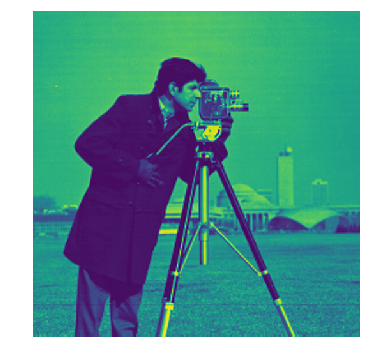

In [13]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(example_image)
ax.axis('off');

## [skimage.draw](https://scikit-image.org/docs/stable/api/skimage.draw.html) - drawing primitives on an image<a id='draw'></a>

The majority of functions in this submodule return the *coordinates* of the specified shape/object in the image, rather than drawing it on the image directly.  The coordinates can then be used as a mask to draw on the image, or you pass the image as well as those coordinates into the convenience function `draw.set_color`.

Lines and circles can be drawn with antialiasing (these functions end in the suffix *_aa).

At the current time text is not supported; other libraries including matplotlib have robust support for overlaying text.

## Example: drawing shapes

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


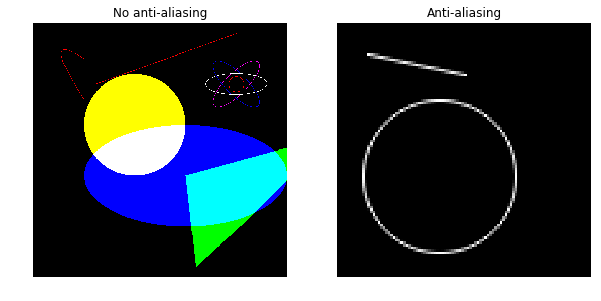

In [15]:
from skimage import draw
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(10, 6))

img = np.zeros((500, 500, 3), dtype=np.float64)

# draw line
rr, cc = draw.line(120, 123, 20, 400)
img[rr, cc, 0] = 255

# fill polygon
poly = np.array((
    (300, 300),
    (480, 320),
    (380, 430),
    (220, 590),
    (300, 300),
))
rr, cc = draw.polygon(poly[:, 0], poly[:, 1], img.shape)
img[rr, cc, 1] = 1

# fill circle
rr, cc = draw.circle(200, 200, 100, img.shape)
img[rr, cc, :] = (1, 1, 0)

# fill ellipse
rr, cc = draw.ellipse(300, 300, 100, 200, img.shape)
img[rr, cc, 2] = 1

# circle
rr, cc = draw.circle_perimeter(120, 400, 15)
img[rr, cc, :] = (1, 0, 0)

# Bezier curve
rr, cc = draw.bezier_curve(70, 100, 10, 10, 150, 100, 1)
img[rr, cc, :] = (1, 0, 0)

# ellipses
rr, cc = draw.ellipse_perimeter(120, 400, 60, 20, orientation=np.pi / 4.)
img[rr, cc, :] = (1, 0, 1)
rr, cc = draw.ellipse_perimeter(120, 400, 60, 20, orientation=-np.pi / 4.)
img[rr, cc, :] = (0, 0, 1)
rr, cc = draw.ellipse_perimeter(120, 400, 60, 20, orientation=np.pi / 2.)
img[rr, cc, :] = (1, 1, 1)

ax1.imshow(img)
ax1.set_title('No anti-aliasing')
ax1.axis('off')


img = np.zeros((100, 100), dtype=np.double)

# anti-aliased line
rr, cc, val = draw.line_aa(12, 12, 20, 50)
img[rr, cc] = val

# anti-aliased circle
rr, cc, val = draw.circle_perimeter_aa(60, 40, 30)
img[rr, cc] = val


ax2.imshow(img, cmap=plt.cm.gray, interpolation='nearest')
ax2.set_title('Anti-aliasing')
ax2.axis('off');

## [skimage.exposure](https://scikit-image.org/docs/stable/api/skimage.exposure.html) - evaluating or changing the exposure of an image<a id='exposure'></a>

One of the most common tools to evaluate exposure is the *histogram*, which plots the number of points which have a certain value against the values in order from lowest (dark) to highest (light).  The function `exposure.histogram` differs from `numpy.histogram` in that there is no rebinnning; each value along the x-axis is preserved.

### Example: Histogram equalization

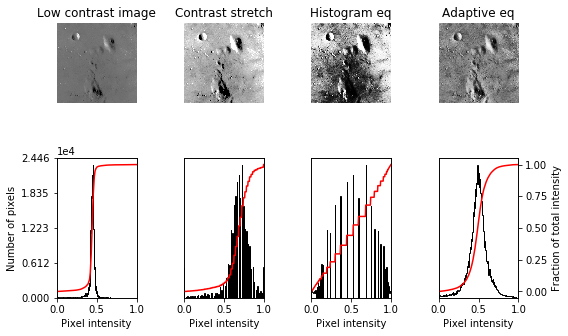

In [16]:
from skimage import data, img_as_float
from skimage import exposure


def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf


# Load an example image
img = data.moon()

# Contrast stretching
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

# Equalization
img_eq = exposure.equalize_hist(img)

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)

# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 4), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, 
                                 sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Contrast stretch')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Histogram eq')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
ax_img.set_title('Adaptive eq')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout();

## [skimage.feature](https://scikit-image.org/docs/stable/api/skimage.feature.html) - extract features from an image<a id='feature'></a>

This submodule presents a diverse set of tools to identify or extract certain features from images, including tools for

* Edge detection
  * `feature.canny`
* Corner detection
  * `feature.corner_kitchen_rosenfeld`
  * `feature.corner_harris`
  * `feature.corner_shi_tomasi`
  * `feature.corner_foerstner`
  * `feature.subpix`
  * `feature.corner_moravec`
  * `feature.corner_fast`
  * `feature.corner_orientations`
* Blob detection
  * `feature.blob_dog`
  * `feature.blob_doh`
  * `feature.blob_log`
* Texture
  * `feature.greycomatrix`
  * `feature.greycoprops`
  * `feature.local_binary_pattern`
  * `feature.multiblock_lbp`
* Peak finding
  * `feature.peak_local_max`
* Object detction
  * `feature.hog`
  * `feature.match_template`
* Stereoscopic depth estimation
  * `feature.daisy`
* Feature matching
  * `feature.ORB`
  * `feature.BRIEF`
  * `feature.CENSURE`
  * `feature.match_descriptors`
  * `feature.plot_matches`


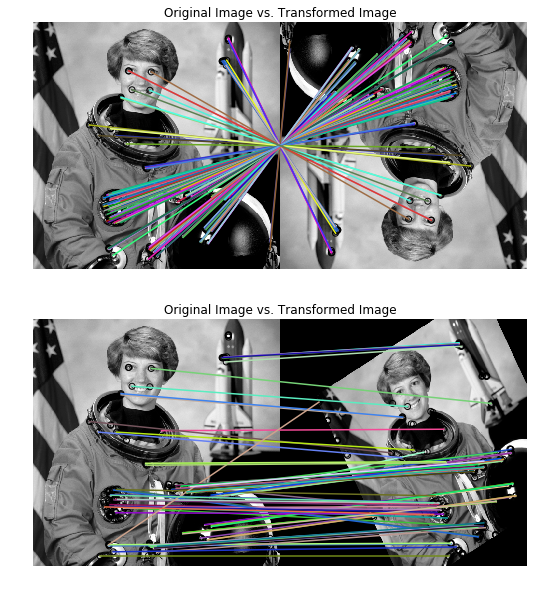

In [17]:
from skimage import data
from skimage import transform as tf
from skimage import feature
from skimage.color import rgb2gray

# Import the astronaut then warp/rotate the image
img1 = rgb2gray(data.astronaut())
img2 = tf.rotate(img1, 180)
tform = tf.AffineTransform(scale=(1.3, 1.1), rotation=0.5,
                           translation=(0, -200))
img3 = tf.warp(img1, tform)

# Build ORB extractor and extract features
descriptor_extractor = feature.ORB(n_keypoints=200)

descriptor_extractor.detect_and_extract(img1)
keypoints1 = descriptor_extractor.keypoints
descriptors1 = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(img2)
keypoints2 = descriptor_extractor.keypoints
descriptors2 = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(img3)
keypoints3 = descriptor_extractor.keypoints
descriptors3 = descriptor_extractor.descriptors

# Find matches between the extracted features
matches12 = feature.match_descriptors(descriptors1, descriptors2, cross_check=True)
matches13 = feature.match_descriptors(descriptors1, descriptors3, cross_check=True)

# Plot the results
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

plt.gray()

feature.plot_matches(ax[0], img1, img2, keypoints1, keypoints2, matches12)
ax[0].axis('off')
ax[0].set_title("Original Image vs. Transformed Image")

feature.plot_matches(ax[1], img1, img3, keypoints1, keypoints3, matches13)
ax[1].axis('off')
ax[1].set_title("Original Image vs. Transformed Image");

## [skimage.filters](https://scikit-image.org/docs/stable/api/skimage.filters.html) - apply filters to an image<a id='filters'></a>

Filtering applies whole-image modifications such as sharpening or blurring.  Thresholding methods also live in this submodule.

Notable functions include (links to relevant gallery examples)

* [Thresholding](https://scikit-image.org/docs/stable/auto_examples/applications/plot_thresholding.html)
  * filters.threshold_* (multiple different functions with this prefix)
  * skimage.filters.try_all_threshold to compare various methods
* [Edge finding/enhancement](https://scikit-image.org/docs/stable/auto_examples/edges/plot_edge_filter.html)
  * filters.sobel
  * filters.prewitt
  * filters.scharr
  * filters.roberts
  * filters.laplace
  * filters.hessian
* [Ridge filters](https://scikit-image.org/docs/stable/auto_examples/edges/plot_ridge_filter.html)
  * filters.meijering
  * filters.sato
  * filters.frangi
* Inverse filtering (see also [skimage.restoration](#restoration))
  * filters.weiner
  * filters.inverse
* [Directional](https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_gabor.html)
  * filters.gabor
* Blurring/denoising
  * filters.gaussian
  * filters.median
* [Sharpening](https://scikit-image.org/docs/stable/auto_examples/filters/plot_unsharp_mask.html)
  * filters.unsharp_mask
* Define your own
  * LPIFilter2D

In [ ]:
from skimage import filters

### Rank filters
There is a sub-submodule, `skimage.filters.rank`, which contains rank filters.  These filters are nonlinear and operate on the local histogram.

## [skimage.future](https://scikit-image.org/docs/stable/api/skimage.future.html) - stable code with unstable API<a id='future'></a>

Bleeding edge features which work well, and will be moved from here into the main package in future releases.  However, on the way their API may change.

## [skimage.graph](https://scikit-image.org/docs/stable/api/skimage.graph.html) - graph theory, minimum cost paths<a id='graph'></a>

Graph theory.  Currently this submodule primarily deals with a constructed "cost" image, and how to find the minimum cost path through it, with constraints if desired.


## [skimage.io](https://scikit-image.org/docs/stable/api/skimage.io.html) - utilities to read and write images in various formats<a id='io'></a>

Reading your image and writing the results back out.  There are multiple plugins available, which support multiple formats.  The most commonly used functions include

* io.imread - Read an image to a numpy array.
* io.imsave - Write an image to disk.
* io.imread_collection - Read multiple images which match a common prefix


## <a id='measure'></a>[skimage.measure](https://scikit-image.org/docs/stable/api/skimage.measure.html) - measuring image or region properties

Multiple algorithms to label images, or obtain information about discrete regions of an image.  

* Label an image
  * measure.label
  
 
* In a labeled image (image with discrete regions identified by unique integers, as returned by `label`), find various properties of the labeled regions.  [**`regionprops` is extremely useful**](https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_regionprops.html)
  * measure.regionprops


* Finding paths from a 2D image, or isosurfaces from a 3D image
  * measure.find_contours
  * measure.marching_cubes_lewiner
  * measure.marching_cubes_classic
  * measure.mesh_surface_area (surface area of 3D mesh from marching cubes)


* Quantify the difference between two whole images (often used in denoising or restoration)
  * measure.compare_*


**RANDom Sample Consensus fitting (RANSAC)** - a powerful, robust approach to fitting a model to data.  It exists here because its initial use was for fitting shapes, but it can also fit transforms.
* measure.ransac
* measure.CircleModel
* measure.EllipseModel
* measure.LineModelND



## <a id='morphology'></a>[skimage.morphology](https://scikit-image.org/docs/stable/api/skimage.morphology.html) - binary and grayscale morphology

Morphological image processing is a collection of non-linear operations related to the shape or morphology of features in an image, such as boundaries, skeletons, etc. In any given technique, we probe an image with a small shape or template called a structuring element, which defines the region of interest or neighborhood around a pixel.

In [18]:
from skimage import morphology as morph

### Example: Flood filling

Flood fill is an algorithm to iteratively identify and/or change adjacent values in an image based on their similarity to an initial seed point. The conceptual analogy is the ‘paint bucket’ tool in many graphic editors.

The `flood` function returns the binary mask of the flooded area.  `flood_fill` returns a modified image.  Both of these can be set with a `tolerance` keyword argument, within which the adjacent region will be filled.

### Example: Binary and grayscale morphology

Here we outline the following basic morphological operations:

1. Erosion
2. Dilation
3. Opening
4. Closing
5. White Tophat
6. Black Tophat
7. Skeletonize
8. Convex Hull

To get started, let’s load an image using `io.imread`. Note that morphology functions only work on gray-scale or binary images, so we set `as_gray=True`.

F:\Anaconda\lib\site-packages\skimage\util\dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


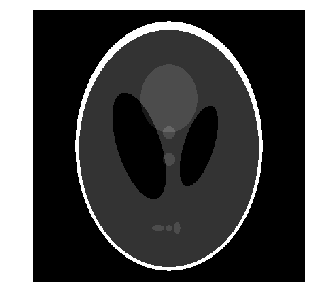

In [20]:
import os
from skimage.data import data_dir
from skimage.util import img_as_ubyte
from skimage import io

orig_phantom = img_as_ubyte(io.imread(os.path.join(data_dir, "phantom.png"),
                                      as_gray=True))
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(orig_phantom, cmap=plt.cm.gray)
ax.axis('off');

In [21]:
def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')

### Erosion

Morphological `erosion` sets a pixel at (i, j) to the minimum over all pixels in the neighborhood centered at (i, j). *Erosion shrinks bright regions and enlarges dark regions.*

The structuring element, `selem`, passed to erosion is a boolean array that describes this neighborhood. Below, we use `disk` to create a circular structuring element, which we use for most of the following examples.

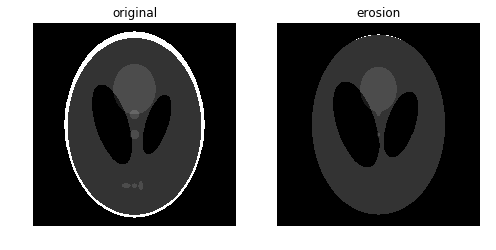

In [22]:
from skimage import morphology as morph

selem = morph.disk(6)
eroded = morph.erosion(orig_phantom, selem)
plot_comparison(orig_phantom, eroded, 'erosion')

### Dilation

Morphological `dilation` sets a pixel at (i, j) to the maximum over all pixels in the neighborhood centered at (i, j). *Dilation enlarges bright regions and shrinks dark regions.*

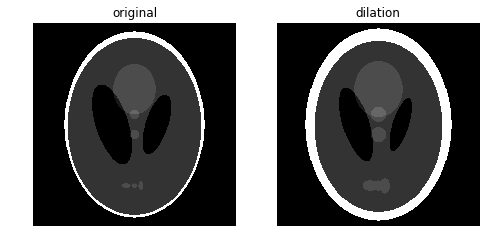

In [23]:
dilated = morph.dilation(orig_phantom, selem)
plot_comparison(orig_phantom, dilated, 'dilation')

Notice how the white boundary of the image thickens, or gets dilated, as we increase the size of the disk. Also notice the decrease in size of the two black ellipses in the centre, and the thickening of the light grey circle in the center and the 3 patches in the lower part of the image.

### Opening

Morphological `opening` on an image is defined as an erosion followed by a dilation. *Opening can remove small bright spots (i.e. “salt”) and connect small dark cracks.*

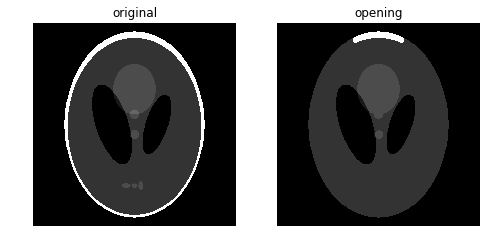

In [24]:
opened = morph.opening(orig_phantom, selem)
plot_comparison(orig_phantom, opened, 'opening')

Since opening an image starts with an erosion operation, light regions that are smaller than the structuring element are removed. The dilation operation that follows ensures that light regions that are larger than the structuring element retain their original size. Notice how the light and dark shapes in the center their original thickness but the 3 lighter patches in the bottom get completely eroded. The size dependence is highlighted by the outer white ring: The parts of the ring thinner than the structuring element were completely erased, while the thicker region at the top retains its original thickness.

### Closing

Morphological `closing` on an image is defined as a dilation followed by an erosion. *Closing can remove small dark spots (i.e. “pepper”) and connect small bright cracks.*

To illustrate this more clearly, let’s add a small crack to the white border:

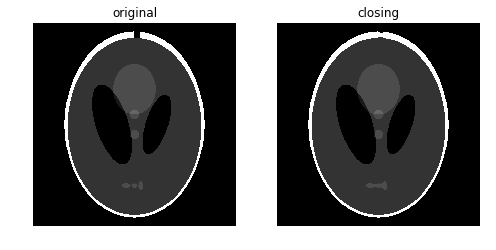

In [25]:
phantom = orig_phantom.copy()
phantom[10:30, 200:210] = 0

closed = morph.closing(phantom, selem)
plot_comparison(phantom, closed, 'closing')

Since closing an image starts with an dilation operation, dark regions that are smaller than the structuring element are removed. The dilation operation that follows ensures that dark regions that are larger than the structuring element retain their original size. Notice how the white ellipses at the bottom get connected because of dilation, but other dark region retain their original sizes. Also notice how the crack we added is mostly removed.

### White tophat

The `white_tophat` of an image is defined as the image minus its morphological opening. *This operation returns the bright spots of the image that are smaller than the structuring element.*

To make things interesting, we’ll add bright and dark spots to the image:

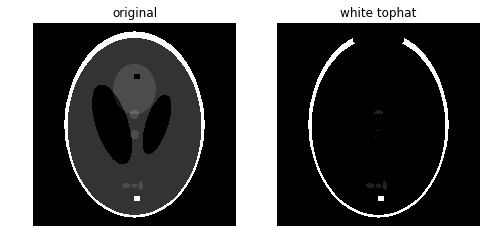

In [26]:
phantom = orig_phantom.copy()
phantom[340:350, 200:210] = 255
phantom[100:110, 200:210] = 0

w_tophat = morph.white_tophat(phantom, selem)
plot_comparison(phantom, w_tophat, 'white tophat')

As you can see, the 10-pixel wide white square is highlighted since it is smaller than the structuring element. Also, the thin, white edges around most of the ellipse are retained because they’re smaller than the structuring element, but the thicker region at the top disappears.

### Black tophat

The `black_tophat` of an image is defined as its morphological closing minus the original image. *This operation returns the dark spots of the image that are smaller than the structuring element.*

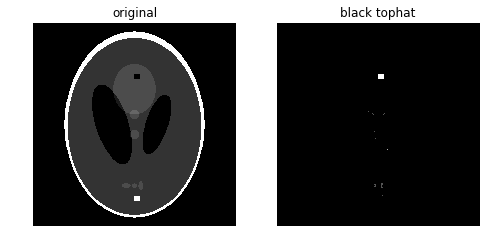

In [27]:
b_tophat = morph.black_tophat(phantom, selem)
plot_comparison(phantom, b_tophat, 'black tophat')

As you can see, the 10-pixel wide black square is highlighted since it is smaller than the structuring element.

#### Duality

As you should have noticed, many of these operations are simply the reverse of another operation. This duality can be summarized as follows:

* Erosion <-> Dilation
* Opening <-> Closing
* White tophat <-> Black tophat


### Skeletonize

Thinning is used to reduce each connected component in a binary image to a single-pixel wide skeleton. It is important to note that this is performed on binary images only.

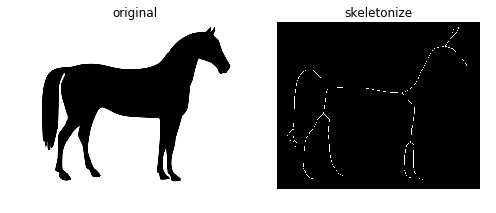

In [28]:
horse = io.imread(os.path.join(data_dir, "horse.png"), as_gray=True)

sk = morph.skeletonize(horse == 0)
plot_comparison(horse, sk, 'skeletonize')

As the name suggests, this technique is used to thin the image to 1-pixel wide skeleton by applying thinning successively.

### Convex hull

The convex_hull_image is the set of pixels included in the smallest convex polygon that surround all white pixels in the input image. Again note that this is also performed on binary images.

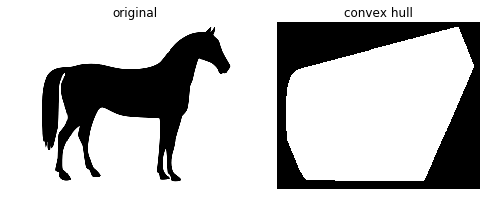

In [29]:
hull1 = morph.convex_hull_image(horse == 0)
plot_comparison(horse, hull1, 'convex hull')

## [skimage.restoration](https://scikit-image.org/docs/stable/api/skimage.restoration.html) - restoration of an image<a id='restoration'></a>

This submodule includes routines to restore images.  Currently these routines fall into four major categories.  Links lead to topical gallery examples.

* [Reducing noise](https://scikit-image.org/docs/stable/auto_examples/filters/plot_denoise.html)
  * restoration.denoise_*
* [Deconvolution](https://scikit-image.org/docs/stable/auto_examples/filters/plot_deconvolution.html), or reversing a convolutional effect which applies to the entire image.  For example, lens correction.  This can be done [unsupervised](https://scikit-image.org/docs/stable/auto_examples/filters/plot_restoration.html).
  * restoration.weiner
  * restoration.unsupervised_weiner
  * restoration.richardson_lucy
* [Inpainting](https://scikit-image.org/docs/stable/auto_examples/filters/plot_inpaint.html), or filling in missing areas of an image
  * restoration.inpaint_biharmonic
* [Phase unwrapping](https://scikit-image.org/docs/stable/auto_examples/filters/plot_phase_unwrap.html)
  * restoration.unwrap_phase

## <a id='segmentation'></a>[skimage.segmentation](https://scikit-image.org/docs/stable/api/skimage.segmentation.html) - identification of regions of interest

One of the key image analysis tasks is identifying regions of interest.  These could be a person, an object, certain features of an animal, microscopic image, or stars.  Segmenting an image is the process of determining where these things you want are in your images.

Segmentation has two overarching categories: Supervised and Unsupervised.

**Supervised** - must provide some guidance (seed points or initial conditions)

* segmentation.random_walker
* segmentation.active_contour
* segmentation.watershed
* segmentation.flood_fill
* segmentation.flood
* some thresholding algorithms in `filters`


**Unsupervised** - no human input

* segmentation.slic
* segmentation.felzenszwalb
* segmentation.chan_vese
* some thresholding algorithms in `filters`


There is a [segmentation lecture](./4_segmentation.ipynb) ([and solution](./solutions/4_segmentation.ipynb)) you may peruse, as well as many [gallery examples](https://scikit-image.org/docs/stable/auto_examples/index.html#segmentation-of-objects) which illustrate all of these segmentation methods.

## [skimage.transform](https://scikit-image.org/docs/stable/api/skimage.transform.html) - transforms & warping<a id='transform'></a>

This submodule has multiple features which fall under the umbrella of transformations.

Forward (`radon`) and inverse (`iradon`) radon transforms, as well as some variants (`iradon_sart`) and the finite versions of these transforms (`frt2` and `ifrt2`).  These are used for [reconstructing medical computed tomography (CT) images](https://scikit-image.org/docs/stable/auto_examples/transform/plot_radon_transform.html).

Hough transforms for identifying lines, circles, and ellipses.

Changing image size, shape, or resolution with `resize`, `rescale`, or `downscale_local_mean`.

`warp`, and `warp_coordinates` which take an image or set of coordinates and translate them through one of the defined `*Transforms` in this submodule.  `estimate_transform` may be assist in estimating the parameters.

[Numerous gallery examples are available](https://scikit-image.org/docs/stable/auto_examples/index.html#geometrical-transformations-and-registration) illustrating these functions.  [The panorama tutorial also includes warping](./solutions/adv3_panorama-stitching-solution.ipynb) via `SimilarityTransform` with parameter estimation via `measure.ransac`.